# Data Collection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('marketing_data.csv')

# EDA

Column descriptions:


*   ID - Customer's unique identification
* Year_Birth - Customer's birth year
* Education - Customer's education
* Marital_Status - Customer's marital status
* Income - Customer's yearly household income
* Kidhome - # of kids in household
* Teenhome - # of teenagers in household
* Dt_Customer - Date of customer's enrollment with the company
* Recency - # of days since customer's last purchase
* MntWines - Amount spent on wine in the last 2 years
* MntFruits - Amount spent on fruit in the last 2 years
* MntMeatProducts - Amount spent on meat in the last 2 years
* MntFishProducts - Amount spent on fish in the last 2 years
* MntSweetProducts - Amount spent on sweet products in the last 2 years
* MntGoldProds - Amount spent on gold products in the last 2 years
* NumDealsPurchases - # of purchases made with a discount
* NumWebPurchases - # of purchases made on company website
* NumCatalogPurchases - # of purchases made on the catalog
* NumStorePurchases - # of purchase made in store
* NumWebVisitsMonth - # of website visits in the last month
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained within the last 2 years
* Country - Country where the customer is located (not from)



Outline:\
Are there any nulls? How are you going to handle them?\
Are there any variables that we need to transform? (Data types, text cleaning, etc.)\
Are there any outliers?\
Can we perform feature engineering?\
Are there any trends within the data?

In [ ]:
data.size

62720

In [ ]:
data.shape

(2240, 28)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In this case, we are going to drop the rows with the null values for numerous reasons:

1. The total null values account for 5%< of the data.
2. We want to keep the Income column as it is an important feature for our analysis
3. Filling in the nulls with the median/mean/mode will not account for the variance with the other variables

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

Variable transformation
We are going to change the following dtypes of the following column:

*   `Dt_Customer` to datetime
* `Income` to float





In [ ]:
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])

<ipython-input-45-bf7e2a1873a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])


In [ ]:
data['Income'] = data['Income'].str.replace("[$,]","").astype(float)

<ipython-input-46-f5fdf9ef0298>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Income'] = data['Income'].str.replace("[$,]","").astype(float)
<ipython-input-46-f5fdf9ef0298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income'] = data['Income'].str.replace("[$,]","").astype(float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Check for outliers

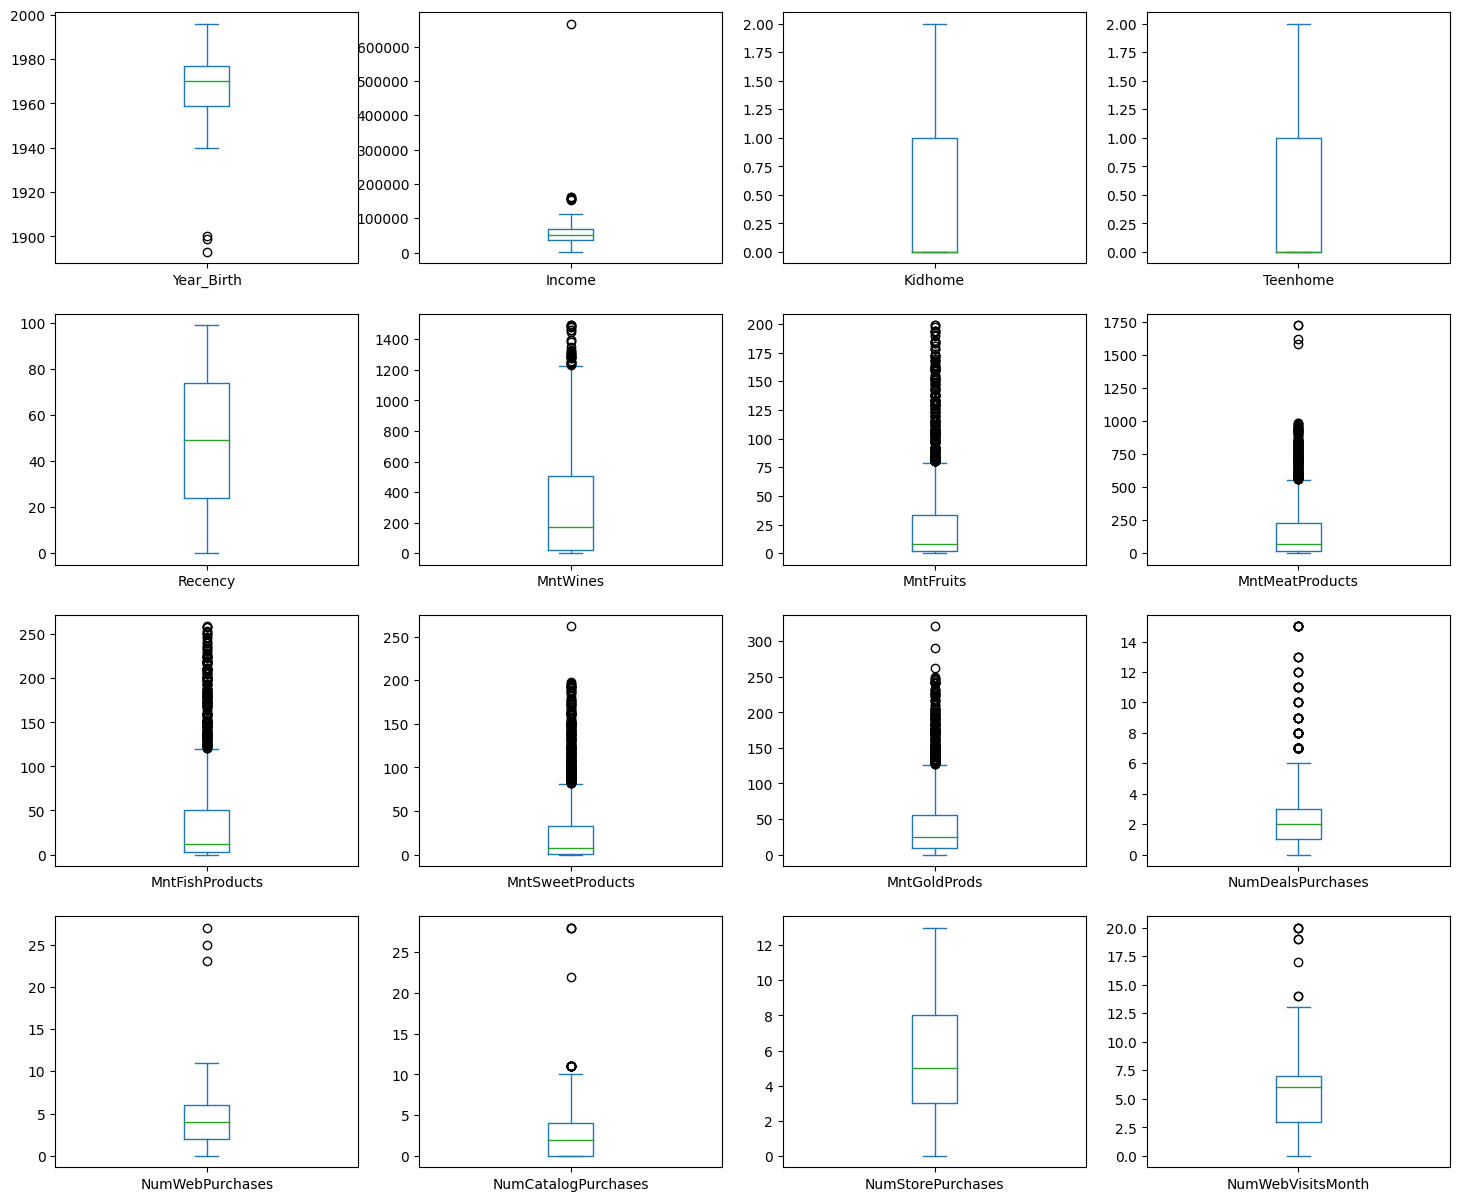

In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Response', 'Complain'])
data[numeric_cols].plot(subplots=True, layout=(4,4), kind='box', figsize=(18,15))

plt.show()

The columns that show true outliers are Year_Birth and Income with people being born before 1900 (meaning that they would be over 100 years old, which is unlikely) and 1 person making over $600,000. These may be data entry errors, but we are not entirely sure.

Let's drop customers who were born before 1900 and the person who has an income over $600,000.

In [ ]:
data = data.drop(data[data['Year_Birth']<=1900].index)

In [ ]:
data['Year_Birth'].sort_values().head()

2171    1940
1740    1941
1350    1943
1644    1943
1209    1943
Name: Year_Birth, dtype: int64

In [ ]:
data= data.drop(data[data['Income']>600000].index)

In [ ]:
data['Income'].sort_values()

1466      1730.0
961       2447.0
1291      3502.0
663       4023.0
14        4428.0
          ...   
325     157146.0
2204    157243.0
853     157733.0
497     160803.0
731     162397.0
Name: Income, Length: 2212, dtype: float64

Variable transformation (cont.)
We'll explore the `Education` and `Marital_Status` columns.

In [ ]:
data['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

To better understand these unique values, let's look at the ages and the income of these customers.

In [ ]:
from datetime import datetime
data['Age'] = datetime.now().year - data['Year_Birth']

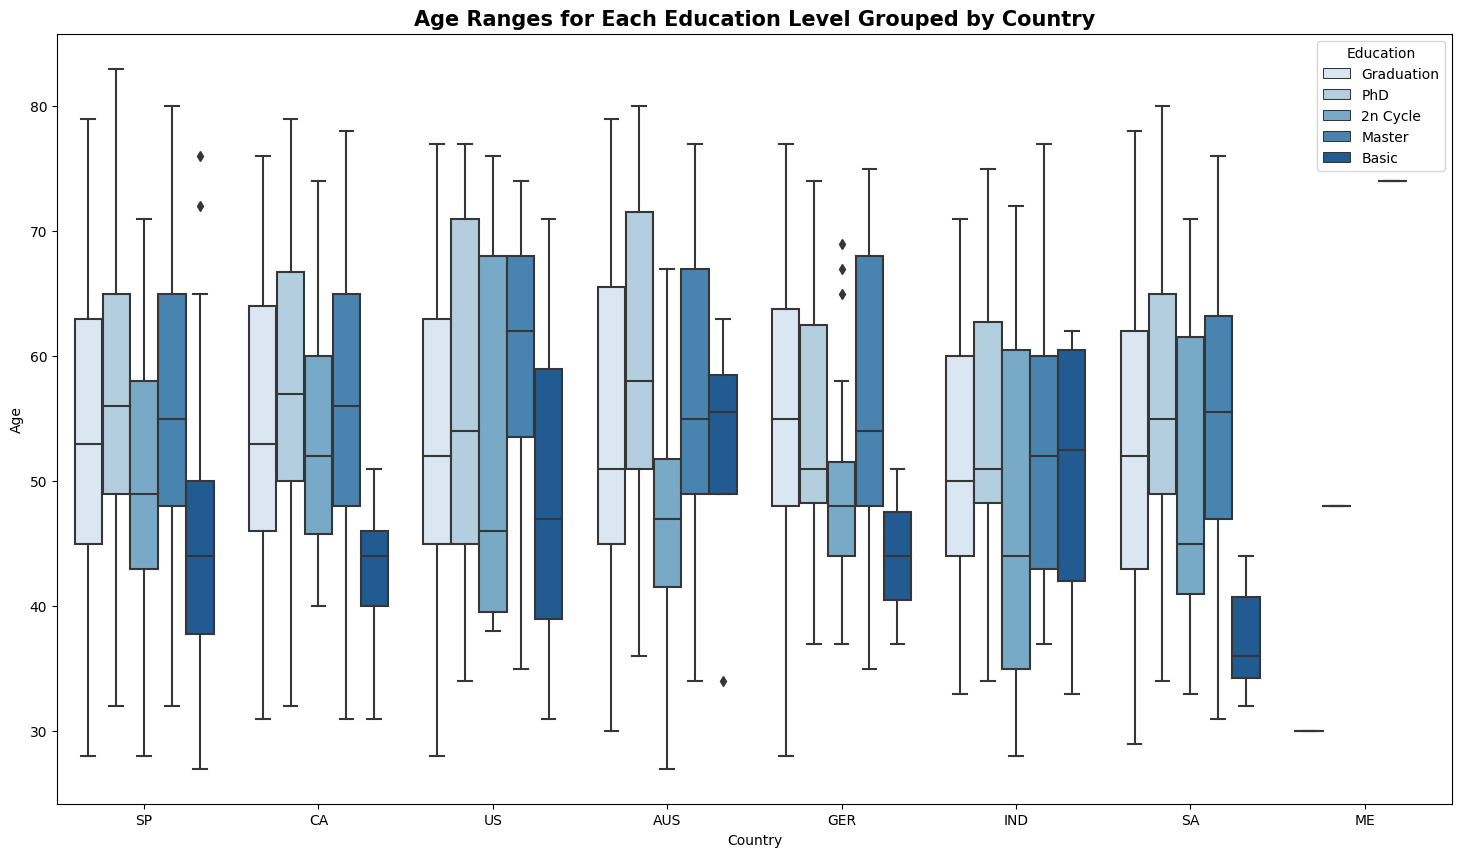

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(x= 'Country', y='Age', hue='Education', data= data,palette="Blues")
plt.title("Age Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

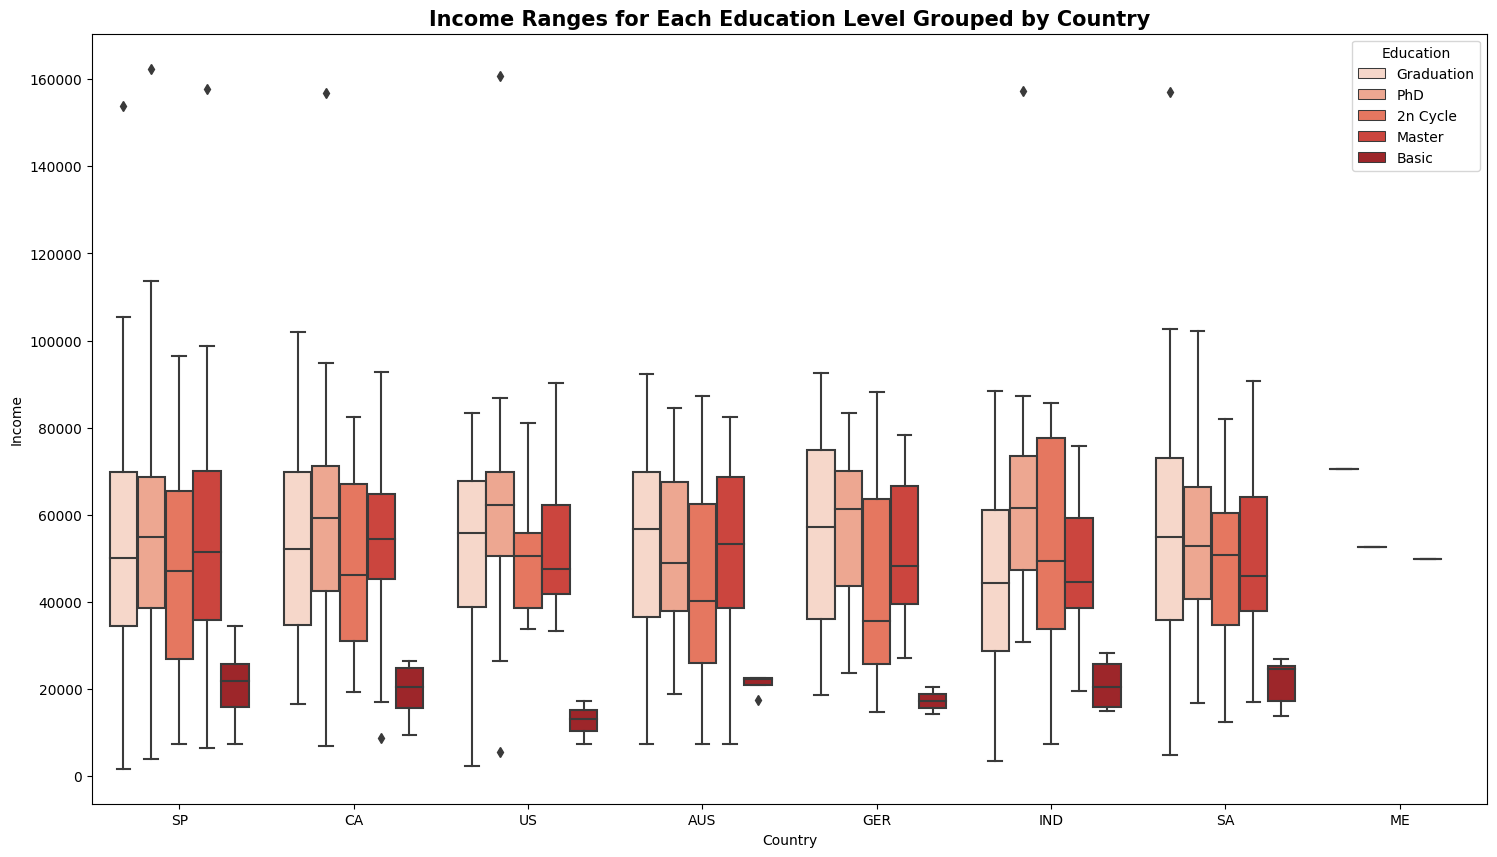

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Income', hue='Education', data=data, palette="Reds")
plt.title("Income Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

According to some research, 2n Cycle represents the education level after bachelors. This is equivalent to a Masters.

In the American education system, the education levels are as follows (highest to lowest):

* PhD. or Advanced Degree
* Masters
* Undergraduate: Bachelors/Associates
* Highschool and below\
What can we conclude from the graph above?

1. `PhD` has a higher (older) age range compared to Graduation, except in Germany.
2. `Basic` has a lowest (younger) age range, except in Australia and India.
3. `Graduation` has a wide income range.

In [ ]:
data['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

For marital status, it is legally defined. The values `Married`, `Single`, `Divorced`, and `Widow` are all acceptable values.

* `Together` can mean they are in a relationship, but they are not married. With the wide age distribution above and legally, we'll classify this as Single.
* Alone will be classified as `Single`.
* `Absurd` and YOLO will be classified as the mode of the values.

In [ ]:
data['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [ ]:
marital_map = {'Divorced':'Divorced', 'Single':'Single', 'Married':'Married', 'Together':'Single',
               'Widow':'Widow', 'YOLO':'Married', 'Alone':'Single', 'Absurd':'Married'}
data['New_Marital_Status'] = data['Marital_Status'].map(marital_map)

In [ ]:
data['New_Marital_Status'].value_counts(dropna=False)

Single      1044
Married      861
Divorced     231
Widow         76
Name: New_Marital_Status, dtype: int64

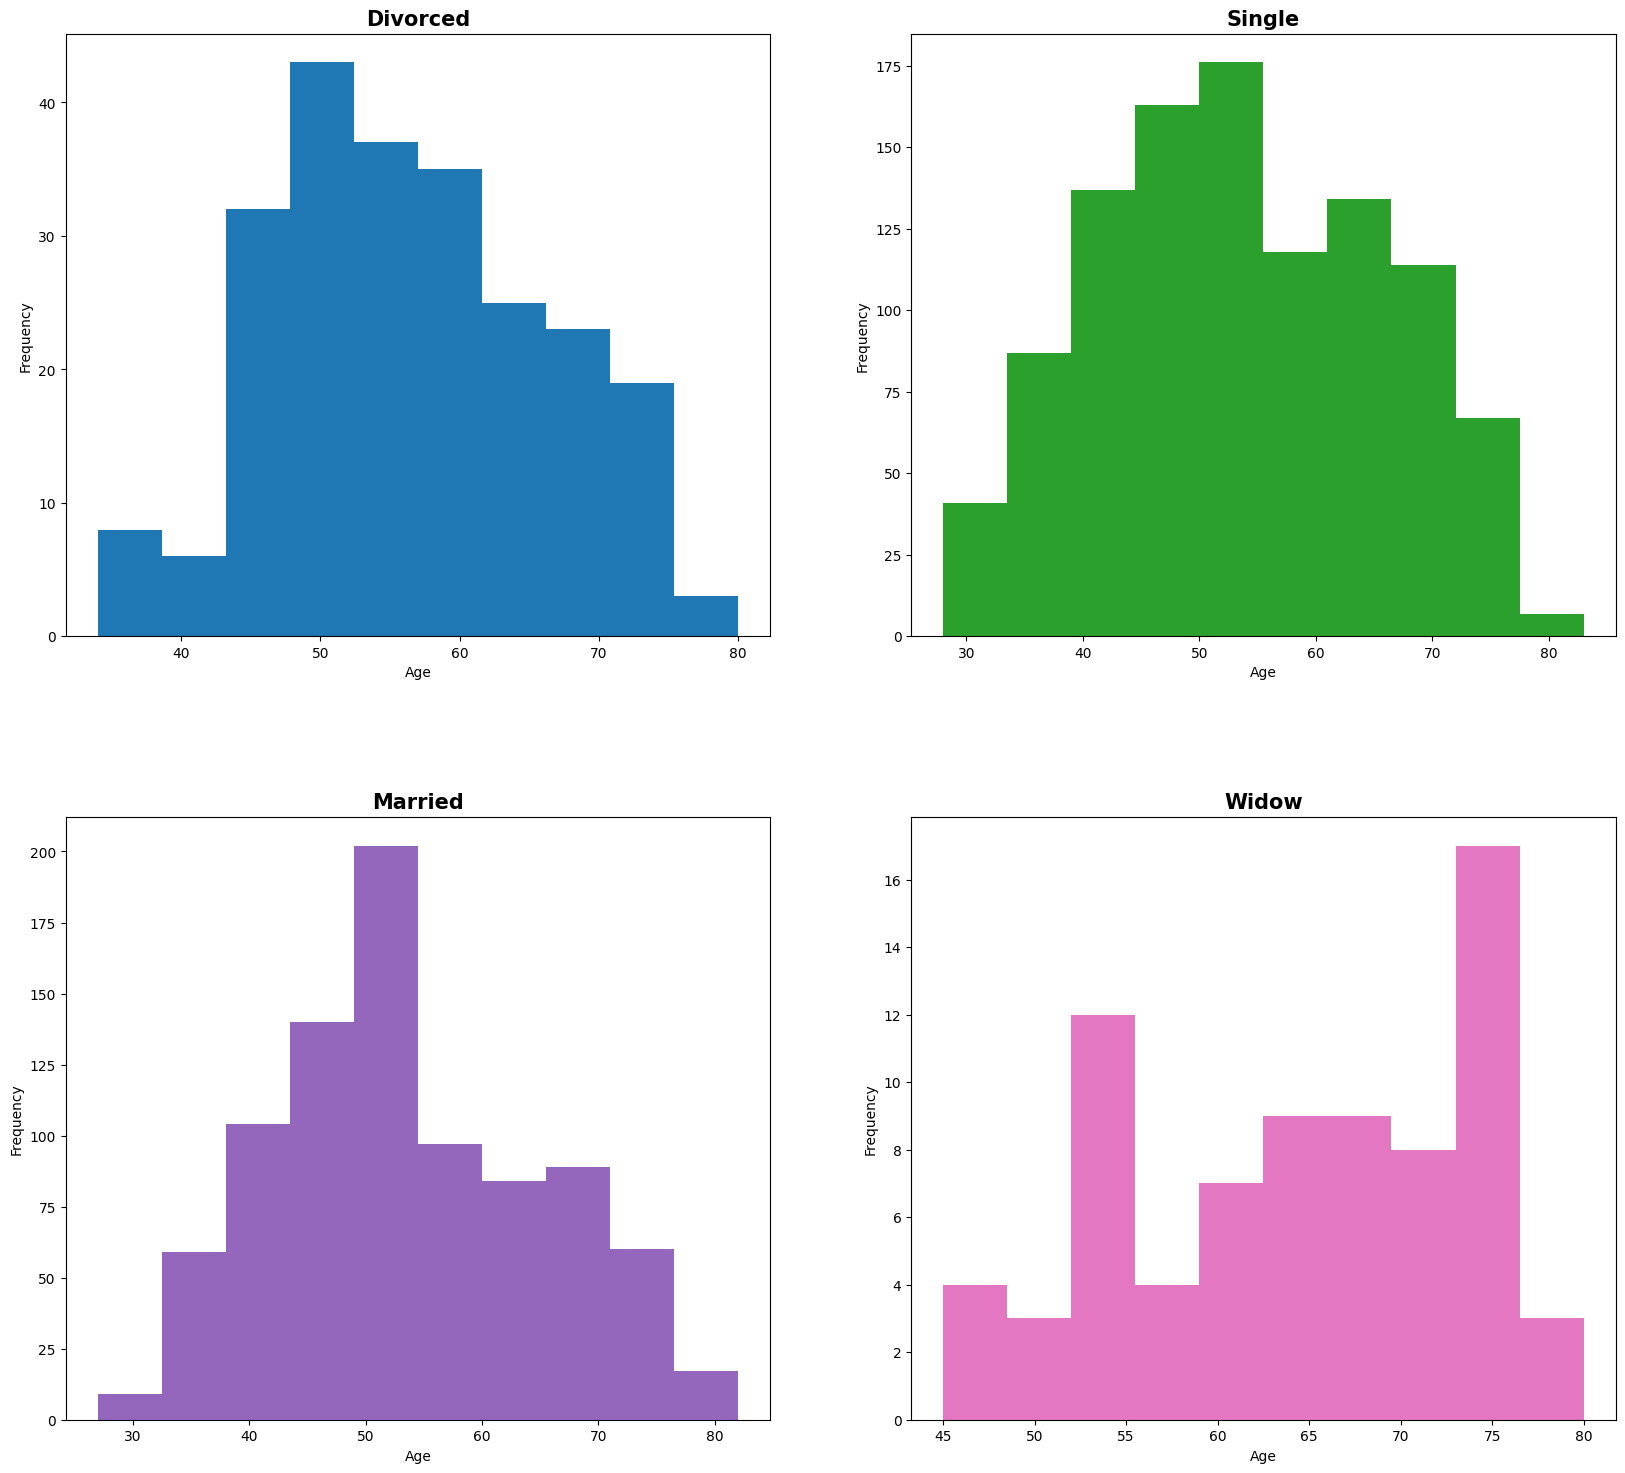

In [ ]:
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20,18))
colors = ['tab:blue','tab:green','tab:purple','tab:pink','tab:cyan']

counter = 0
unique_vals = data['New_Marital_Status'].unique()

for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ax.hist(data[data['New_Marital_Status'] == unique_vals[counter]]['Age'],
                color=colors[counter])
        ax.set_title('{}'.format(unique_vals[counter]), fontdict={'fontsize':15, 'fontweight':'bold'})
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
        plt.subplots_adjust(hspace=0.3)

        counter+=1

# Data Visualizations

Here, we'll be creating additional visualizations to gain further insight.

Questions we'll be answering:

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

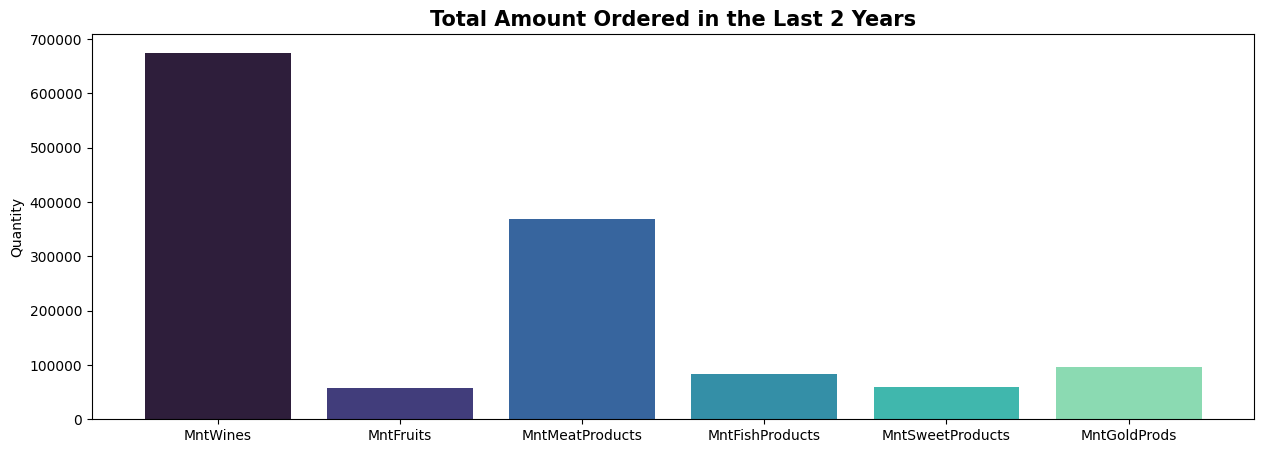

In [ ]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

fig = plt.figure(figsize=(15,5))
colors =  sns.color_palette("mako")
plt.bar(x=product_cols,
        height=data[product_cols].sum(),
        color=colors)
plt.title("Total Amount Ordered in the Last 2 Years", fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel("Quantity")

plt.show()

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for col in campaign_cols:
    print(data[col].value_counts())

0    2070
1     142
Name: AcceptedCmp1, dtype: int64
0    2182
1      30
Name: AcceptedCmp2, dtype: int64
0    2049
1     163
Name: AcceptedCmp3, dtype: int64
0    2048
1     164
Name: AcceptedCmp4, dtype: int64
0    2051
1     161
Name: AcceptedCmp5, dtype: int64
0    1879
1     333
Name: Response, dtype: int64


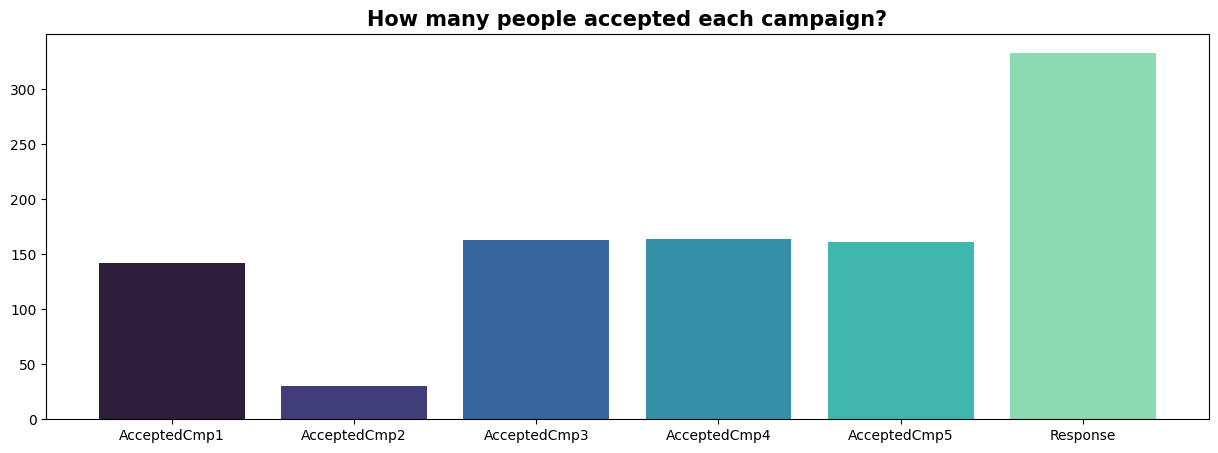

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
fig = plt.figure(figsize=(15,5))
colors =  sns.color_palette("mako")
plt.bar(x=campaign_cols,
        height=data[campaign_cols].sum(), color= colors)

plt.title("How many people accepted each campaign?", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

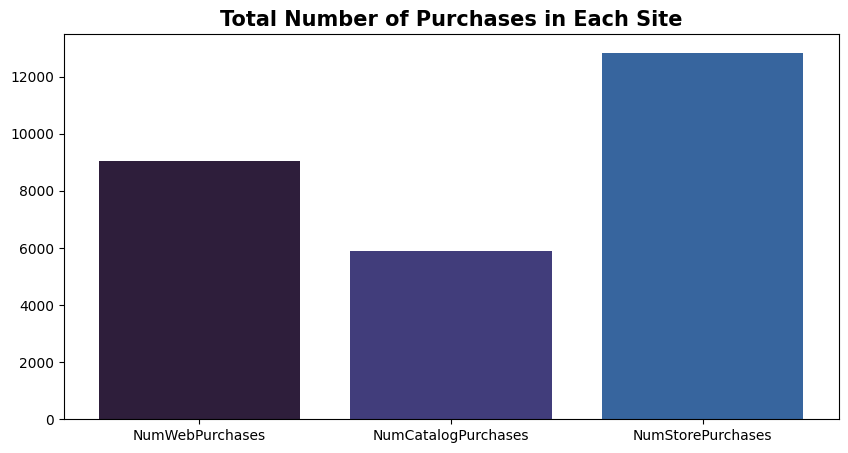

In [ ]:
fig = plt.figure(figsize=(10,5))
colors = sns.color_palette("mako")
plt.bar(x=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'],
        height=data[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(),color=colors)
plt.title("Total Number of Purchases in Each Site", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

In [ ]:
data['Income_class'] = np.where(data['Income']<40000, 'Low',
                                np.where(data['Income'].between(40000, 120000, inclusive= 'right'), 'Middle',
                                         'Upper'))

<ipython-input-69-89afd026ee69>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['Average_qty'] = low['Qty'] / num_low_customers
<ipython-input-69-89afd026ee69>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle['Average_qty'] = middle['Qty'] / num_mid_customers
<ipython-input-69-89afd026ee69>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

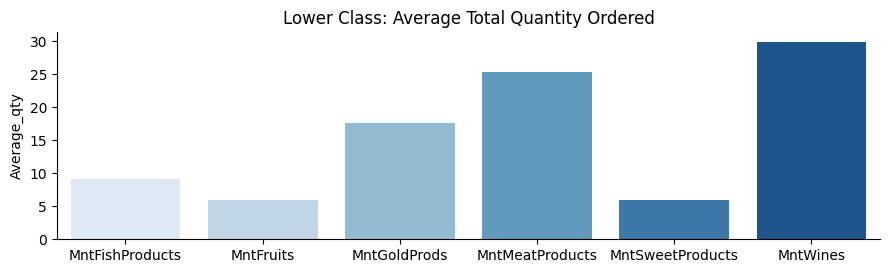

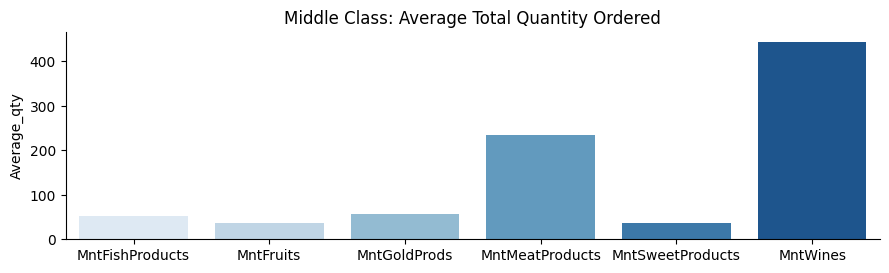

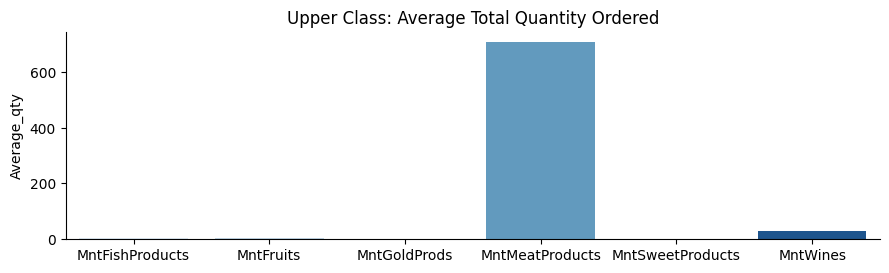

In [ ]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

num_low_customers = data[data['Income_class'] == "Low"].shape[0]
num_mid_customers = data[data['Income_class'] == "Middle"].shape[0]
num_upp_customers = data[data['Income_class'] == "Upper"].shape[0]

tidy = data.melt(id_vars='Income_class',
                 value_vars=product_cols,
                 value_name='Qty').groupby(['Income_class','variable']).sum().reset_index()


low = tidy[tidy['Income_class']=='Low']
middle = tidy[tidy['Income_class']=='Middle']
upper = tidy[tidy['Income_class']=='Upper']

low['Average_qty'] = low['Qty'] / num_low_customers
middle['Average_qty'] = middle['Qty'] / num_mid_customers
upper['Average_qty'] = upper['Qty'] / num_upp_customers

colors= sns.color_palette("mako", as_cmap=True)
p1 = sns.catplot(x='variable', y='Average_qty', row='Income_class',
                 data=low,
                 kind='bar',
                 height=3, aspect=3, palette="Blues")
p2 = sns.catplot(x='variable', y='Average_qty', row='Income_class',
                 data=middle,
                 kind='bar',
                 height=3, aspect=3, palette="Blues")
p3 = sns.catplot(x='variable', y='Average_qty', row='Income_class',
                 data=upper,
                 kind='bar',
                 height=3, aspect=3, palette="Blues")

p1.set(xlabel=None, title="Lower Class: Average Total Quantity Ordered")
p2.set(xlabel=None, title="Middle Class: Average Total Quantity Ordered")
p3.set(xlabel=None, title="Upper Class: Average Total Quantity Ordered")

plt.show()

We can say that people use meat products the most for all catogories

# Findings From The Analysis

1. `PhD` degree customers' age range is the highest than others except in Germany.
2. `Basic` degree customers have the lowest income in all countries.
3. Mode age for `Married` people is 50, it is 50, 50, 75 for `Divorced`, `Single`, `Widow` people, respectively.
4. The most amount ordered product in last 2 years was `Wine`.
5. Total people who were accepted campaign was over 300 and `campaign 3,4,5`, were favorite ones.
6. Total number of purchases in `Store` was the highest with following `Web` purchses and the lowest one was `Catalog` Purchases.